# Analysis of Association between Socioeconomic Factors on Voter Engagement in Massachusetts

## Project Objective

Voter turnout in the US is tremendously unequal. Since voter participation is essential for the success of the democratic system, we will analyze the association between socioeconomic factors such as education, demographic, and finance on voter engagement for the Commonwealth of Massachusetts.

Specifically, we will analyze which factors drive the voter engagement in Massachusetts, and build Logistic Regression, XGboost, as well as Random Forest models to predict the voter engagement so as to know whether a voter is active or not. 

## Motivation

#### Do you want to predict the voter engagement in MA? If yes, then this is what you want!

In this notebook, you will know the whole process of analyzing Association between Socioeconomic Factors on Voter Registration in Massachusetts. It includes the following part:
1. Packages Import and Data Schema
2. Loading and Caching into PySpark Dataframe
3. Data Cleaning
4. Exploratory Data Analysis (EDA)
5. Machine Learning
6. Report summary

If you want to know how we decide the socieconomic factors for voter registration, please go to the 4th part. 

To learn which machine learning model works best for prediction of voter registration, please go to the 5th part. You can choose any model that you would like to predict voter registration in the future!

## Data Source

* Massachusetts Voter Registration Dataset
    * Web: WWW.L2POLITICAL.COM

## Team 8 - Team Members

* Aditya Sinha
* Chun Zhou
* Sri Amruta Sripada
* Yihao Yao
* Zhirui Huang

## 1: Packages Import and Data Schema

In [1]:
from pyspark.sql.functions import col
from pyspark.sql.types import *
from pyspark.sql import functions as F
from pyspark.sql.window import Window
import matplotlib.pyplot as plt
import pandas as pd 
plt.style.use('ggplot') 
%matplotlib inline

# specifying the path to our bucket where the data is located (no need to edit this path anymore)
data = "gs://" + 'is-843-voter' + "/notebooks/jupyter/"
print(data)

gs://is-843-voter/notebooks/jupyter/


In [2]:
VoterSchema = StructType([ 
 StructField('SEQUENCE',IntegerType(), True),
 StructField('LALVOTERID',StringType(), True),
 StructField('Voters_Active',StringType(), True),
 StructField('Voters_StateVoterID',IntegerType(), True),
 StructField('Voters_CountyVoterID',StringType(), True),
 StructField('VoterTelephones_LandlineAreaCode',IntegerType(), True),
 StructField('VoterTelephones_Landline7Digit',StringType(), True),
 StructField('VoterTelephones_LandlineFormatted',StringType(), True),
 StructField('VoterTelephones_LandlineUnformatted',LongType(), True),
 StructField('VoterTelephones_LandlineConfidenceCode',IntegerType(), True),
 StructField('VoterTelephones_CellPhoneOnly',BooleanType(), True),
 StructField('VoterTelephones_CellPhoneFormatted',StringType(), True),
 StructField('VoterTelephones_CellPhoneUnformatted',LongType(), True),
 StructField('VoterTelephones_CellConfidenceCode',IntegerType(), True),
 StructField('Voters_FirstName',StringType(), True),
 StructField('Voters_MiddleName',StringType(), True),
 StructField('Voters_LastName',StringType(), True),
 StructField('Voters_NameSuffix',StringType(), True),
 StructField('Residence_Addresses_AddressLine',StringType(), True),
 StructField('Residence_Addresses_ExtraAddressLine',StringType(), True),
 StructField('Residence_Addresses_City',StringType(), True),
 StructField('Residence_Addresses_State',StringType(), True),
 StructField('Residence_Addresses_Zip',IntegerType(), True),
 StructField('Residence_Addresses_ZipPlus4',IntegerType(), True),
 StructField('Residence_Addresses_HouseNumber',StringType(), True),
 StructField('Residence_Addresses_PrefixDirection',StringType(), True),
 StructField('Residence_Addresses_StreetName',StringType(), True),
 StructField('Residence_Addresses_Designator',StringType(), True),
 StructField('Residence_Addresses_SuffixDirection',StringType(), True),
 StructField('Residence_Addresses_ApartmentNum',StringType(), True),
 StructField('Residence_Addresses_ApartmentType',StringType(), True),
 StructField('Residence_Addresses_CassErrStatCode',StringType(), True),
 StructField('Voters_SequenceZigZag',IntegerType(), True),
 StructField('Voters_SequenceOddEven',IntegerType(), True),
 StructField('Residence_Addresses_CensusTract',IntegerType(), True),
 StructField('Residence_Addresses_CensusBlockGroup',IntegerType(), True),
 StructField('Residence_Addresses_CensusBlock',IntegerType(), True),
 StructField('Residence_Addresses_Latitude',DoubleType(), True),
 StructField('Residence_Addresses_Longitude',DoubleType(), True),
 StructField('Residence_Addresses_LatLongAccuracy',StringType(), True),
 StructField('Residence_Addresses_Property_LandSq_Footage',IntegerType(), True),
 StructField('Residence_Addresses_Property_HomeSq_Footage',IntegerType(), True),
 StructField('Residence_Addresses_Density',IntegerType(), True),
 StructField('Residence_Families_FamilyID',StringType(), True),
 StructField('Residence_Families_HHCount',IntegerType(), True),
 StructField('Residence_HHGender_Description',StringType(), True),
 StructField('Residence_HHParties_Description',StringType(), True),
 StructField('Mailing_Addresses_AddressLine',StringType(), True),
 StructField('Mailing_Addresses_ExtraAddressLine',StringType(), True),
 StructField('Mailing_Addresses_City',StringType(), True),
 StructField('Mailing_Addresses_State',StringType(), True),
 StructField('Mailing_Addresses_Zip',IntegerType(), True),
 StructField('Mailing_Addresses_ZipPlus4',IntegerType(), True),
 StructField('Mailing_Addresses_HouseNumber',StringType(), True),
 StructField('Mailing_Addresses_PrefixDirection',StringType(), True),
 StructField('Mailing_Addresses_StreetName',StringType(), True),
 StructField('Mailing_Addresses_Designator',StringType(), True),
 StructField('Mailing_Addresses_SuffixDirection',StringType(), True),
 StructField('Mailing_Addresses_ApartmentNum',StringType(), True),
 StructField('Mailing_Addresses_ApartmentType',StringType(), True),
 StructField('Mailing_Addresses_CassErrStatCode',StringType(), True),
 StructField('Mailing_Families_FamilyID',StringType(), True),
 StructField('Mailing_Families_HHCount',IntegerType(), True),
 StructField('Mailing_HHGender_Description',StringType(), True),
 StructField('Mailing_HHParties_Description',StringType(), True),
 StructField('Voters_Gender',StringType(), True),
 StructField('Voters_Age',IntegerType(), True),
 StructField('Voters_BirthDate',StringType(), True),
 StructField('DateConfidence_Description',StringType(), True),
 StructField('Parties_Description',StringType(), True),
 StructField('VoterParties_Change_Changed_Party',StringType(), True),
 StructField('Ethnic_Description',StringType(), True),
 StructField('EthnicGroups_EthnicGroup1Desc',StringType(), True),
 StructField('CountyEthnic_LALEthnicCode',StringType(), True),
 StructField('CountyEthnic_Description',StringType(), True),
 StructField('Religions_Description',StringType(), True),
 StructField('Voters_CalculatedRegDate',StringType(), True),
 StructField('Voters_OfficialRegDate',StringType(), True),
 StructField('Voters_PlaceOfBirth',StringType(), True),
 StructField('Languages_Description',StringType(), True),
 StructField('AbsenteeTypes_Description',StringType(), True),
 StructField('MilitaryStatus_Description',StringType(), True),
 StructField('MaritalStatus_Description',StringType(), True),
 StructField('US_Congressional_District',IntegerType(), True),
 StructField('AddressDistricts_Change_Changed_CD',StringType(), True),
 StructField('State_Senate_District',IntegerType(), True),
 StructField('AddressDistricts_Change_Changed_SD',StringType(), True),
 StructField('State_House_District',IntegerType(), True),
 StructField('AddressDistricts_Change_Changed_HD',StringType(), True),
 StructField('State_Legislative_District',StringType(), True),
 StructField('AddressDistricts_Change_Changed_LD',StringType(), True),
 StructField('2001_US_Congressional_District',StringType(), True),
 StructField('2001_State_Senate_District',IntegerType(), True),
 StructField('2001_State_House_District',IntegerType(), True),
 StructField('2001_State_Legislative_District',StringType(), True),
 StructField('County',StringType(), True),
 StructField('Voters_FIPS',IntegerType(), True),
 StructField('AddressDistricts_Change_Changed_County',StringType(), True),
 StructField('Precinct',StringType(), True),
 StructField('County_Commissioner_District',StringType(), True),
 StructField('County_Supervisorial_District',StringType(), True),
 StructField('County_Legislative_District',StringType(), True),
 StructField('City',StringType(), True),
 StructField('City_Council_Commissioner_District',StringType(), True),
 StructField('City_Ward',StringType(), True),
 StructField('City_Mayoral_District',StringType(), True),
 StructField('Town_District',StringType(), True),
 StructField('Town_Ward',StringType(), True),
 StructField('Town_Council',StringType(), True),
 StructField('Village',StringType(), True),
 StructField('Village_Ward',StringType(), True),
 StructField('Township',StringType(), True),
 StructField('Township_Ward',StringType(), True),
 StructField('Borough',StringType(), True),
 StructField('Borough_Ward',StringType(), True),
 StructField('Hamlet_Community_Area',StringType(), True),
 StructField('4H_Livestock_District',StringType(), True),
 StructField('Airport_District',StringType(), True),
 StructField('Annexation_District',StringType(), True),
 StructField('Aquatic_Center_District',StringType(), True),
 StructField('Aquatic_District',StringType(), True),
 StructField('Assessment_District',StringType(), True),
 StructField('Bay_Area_Rapid_Transit',StringType(), True),
 StructField('Board_of_Education_District',StringType(), True),
 StructField('Board_of_Education_SubDistrict',StringType(), True),
 StructField('Bonds_District',StringType(), True),
 StructField('Career_Center',StringType(), True),
 StructField('Cemetery_District',StringType(), True),
 StructField('Central_Committee_District',StringType(), True),
 StructField('Chemical_Control_District',StringType(), True),
 StructField('City_School_District',StringType(), True),
 StructField('Coast_Water_District',StringType(), True),
 StructField('College_Board_District',StringType(), True),
 StructField('Committee_Super_District',StringType(), True),
 StructField('Communications_District',StringType(), True),
 StructField('Community_College',StringType(), True),
 StructField('Community_College_Commissioner_District',StringType(), True),
 StructField('Community_College_SubDistrict',StringType(), True),
 StructField('Community_College_At_Large',StringType(), True),
 StructField('Community_Council_District',StringType(), True),
 StructField('Community_Council_SubDistrict',StringType(), True),
 StructField('Community_Facilities_District',StringType(), True),
 StructField('Community_Facilities_SubDistrict',StringType(), True),
 StructField('Community_Hospital_District',StringType(), True),
 StructField('Community_Planning_Area',StringType(), True),
 StructField('Community_Service_District',StringType(), True),
 StructField('Community_Service_SubDistrict',StringType(), True),
 StructField('Congressional_Township',StringType(), True),
 StructField('Conservation_District',StringType(), True),
 StructField('Conservation_SubDistrict',StringType(), True),
 StructField('Consolidated_Water_District',StringType(), True),
 StructField('Control_Zone_District',StringType(), True),
 StructField('Corrections_District',StringType(), True),
 StructField('County_Board_of_Education_District',StringType(), True),
 StructField('County_Board_of_Education_SubDistrict',StringType(), True),
 StructField('County_Community_College_District',StringType(), True),
 StructField('County_Fire_District',StringType(), True),
 StructField('County_Hospital_District',StringType(), True),
 StructField('County_Library_District',StringType(), True),
 StructField('County_Memorial_District',StringType(), True),
 StructField('County_Paramedic_District',StringType(), True),
 StructField('County_Service_Area',StringType(), True),
 StructField('County_Service_Area_SubDistrict',StringType(), True),
 StructField('County_Sewer_District',StringType(), True),
 StructField('County_Superintendent_of_Schools_District',StringType(), True),
 StructField('County_Unified_School_District',StringType(), True),
 StructField('County_Water_District',StringType(), True),
 StructField('County_Water_Landowner_District',StringType(), True),
 StructField('County_Water_SubDistrict',StringType(), True),
 StructField('Democratic_Convention_Member',StringType(), True),
 StructField('Democratic_Zone',StringType(), True),
 StructField('Designated_Market_Area_DMA',StringType(), True),
 StructField('District_Attorney',StringType(), True),
 StructField('Drainage_District',StringType(), True),
 StructField('Education_Commission_District',StringType(), True),
 StructField('Educational_Service_District',StringType(), True),
 StructField('Educational_Service_Subdistrict',StringType(), True),
 StructField('Election_Commissioner_District',StringType(), True),
 StructField('Elementary_School_District',StringType(), True),
 StructField('Elementary_School_SubDistrict',StringType(), True),
 StructField('Emergency_Communication_911_District',StringType(), True),
 StructField('Emergency_Communication_911_SubDistrict',StringType(), True),
 StructField('Enterprise_Zone_District',StringType(), True),
 StructField('Exempted_Village_School_District',StringType(), True),
 StructField('EXT_District',StringType(), True),
 StructField('Facilities_Improvement_District',StringType(), True),
 StructField('Fire_District',StringType(), True),
 StructField('Fire_Maintenance_District',StringType(), True),
 StructField('Fire_Protection_District',StringType(), True),
 StructField('Fire_Protection_SubDistrict',StringType(), True),
 StructField('Fire_Protection_Tax_Measure_District',StringType(), True),
 StructField('Fire_Service_Area_District',StringType(), True),
 StructField('Fire_SubDistrict',StringType(), True),
 StructField('Flood_Control_Zone',StringType(), True),
 StructField('Forest_Preserve',StringType(), True),
 StructField('Garbage_District',StringType(), True),
 StructField('Geological_Hazard_Abatement_District',StringType(), True),
 StructField('Health_District',StringType(), True),
 StructField('High_School_District',StringType(), True),
 StructField('High_School_SubDistrict',StringType(), True),
 StructField('Hospital_District',StringType(), True),
 StructField('Hospital_SubDistrict',StringType(), True),
 StructField('Improvement_Landowner_District',StringType(), True),
 StructField('Independent_Fire_District',StringType(), True),
 StructField('Irrigation_District',StringType(), True),
 StructField('Irrigation_SubDistrict',StringType(), True),
 StructField('Island',StringType(), True),
 StructField('Judicial_Appellate_District',StringType(), True),
 StructField('Judicial_Chancery_Court',StringType(), True),
 StructField('Judicial_Circuit_Court_District',StringType(), True),
 StructField('Judicial_County_Board_of_Review_District',StringType(), True),
 StructField('Judicial_County_Court_District',StringType(), True),
 StructField('Judicial_District',StringType(), True),
 StructField('Judicial_District_Court_District',StringType(), True),
 StructField('Judicial_Family_Court_District',StringType(), True),
 StructField('Judicial_Jury_District',StringType(), True),
 StructField('Judicial_Juvenile_Court_District',StringType(), True),
 StructField('Judicial_Magistrate_Division',StringType(), True),
 StructField('Judicial_Sub_Circuit_District',StringType(), True),
 StructField('Judicial_Superior_Court_District',StringType(), True),
 StructField('Judicial_Supreme_Court_District',StringType(), True),
 StructField('Justice_of_the_Peace',StringType(), True),
 StructField('Land_Commission',StringType(), True),
 StructField('Landscaping_And_Lighting_Assessment_Distric',StringType(), True),
 StructField('Law_Enforcement_District',StringType(), True),
 StructField('Learning_Community_Coordinating_Council_District',StringType(), True),
 StructField('Levee_District',StringType(), True),
 StructField('Levee_Reconstruction_Assesment_District',StringType(), True),
 StructField('Library_District',StringType(), True),
 StructField('Library_Services_District',StringType(), True),
 StructField('Library_SubDistrict',StringType(), True),
 StructField('Lighting_District',StringType(), True),
 StructField('Local_Hospital_District',StringType(), True),
 StructField('Local_Park_District',StringType(), True),
 StructField('Maintenance_District',StringType(), True),
 StructField('Master_Plan_District',StringType(), True),
 StructField('Memorial_District',StringType(), True),
 StructField('Metro_Service_District',StringType(), True),
 StructField('Metro_Service_Subdistrict',StringType(), True),
 StructField('Metro_Transit_District',StringType(), True),
 StructField('Metropolitan_Water_District',StringType(), True),
 StructField('Middle_School_District',StringType(), True),
 StructField('Mosquito_Abatement_District',StringType(), True),
 StructField('Mountain_Water_District',StringType(), True),
 StructField('Multi_township_Assessor',StringType(), True),
 StructField('Municipal_Advisory_Council_District',StringType(), True),
 StructField('Municipal_Court_District',StringType(), True),
 StructField('Municipal_Utility_District',StringType(), True),
 StructField('Municipal_Utility_SubDistrict',StringType(), True),
 StructField('Municipal_Water_District',StringType(), True),
 StructField('Municipal_Water_SubDistrict',StringType(), True),
 StructField('Museum_District',StringType(), True),
 StructField('Northeast_Soil_and_Water_District',StringType(), True),
 StructField('Open_Space_District',StringType(), True),
 StructField('Open_Space_SubDistrict',StringType(), True),
 StructField('Other',StringType(), True),
 StructField('Paramedic_District',StringType(), True),
 StructField('Park_Commissioner_District',StringType(), True),
 StructField('Park_District',StringType(), True),
 StructField('Park_SubDistrict',StringType(), True),
 StructField('Planning_Area_District',StringType(), True),
 StructField('Police_District',StringType(), True),
 StructField('Port_District',StringType(), True),
 StructField('Port_SubDistrict',StringType(), True),
 StructField('Power_District',StringType(), True),
 StructField('Proposed_City',StringType(), True),
 StructField('Proposed_City_Commissioner_District',StringType(), True),
 StructField('Proposed_Community_College',StringType(), True),
 StructField('Proposed_District',StringType(), True),
 StructField('Proposed_Elementary_School_District',StringType(), True),
 StructField('Proposed_Fire_District',StringType(), True),
 StructField('Proposed_Unified_School_District',StringType(), True),
 StructField('Public_Airport_District',StringType(), True),
 StructField('Public_Regulation_Commission',StringType(), True),
 StructField('Public_Service_Commission_District',StringType(), True),
 StructField('Public_Utility_District',StringType(), True),
 StructField('Public_Utility_SubDistrict',StringType(), True),
 StructField('Rapid_Transit_District',StringType(), True),
 StructField('Rapid_Transit_SubDistrict',StringType(), True),
 StructField('Reclamation_District',StringType(), True),
 StructField('Recreation_District',StringType(), True),
 StructField('Recreational_SubDistrict',StringType(), True),
 StructField('Regional_Office_of_Education_District',StringType(), True),
 StructField('Republican_Area',StringType(), True),
 StructField('Republican_Convention_Member',StringType(), True),
 StructField('Resort_Improvement_District',StringType(), True),
 StructField('Resource_Conservation_District',StringType(), True),
 StructField('River_Water_District',StringType(), True),
 StructField('Road_Maintenance_District',StringType(), True),
 StructField('Rural_Service_District',StringType(), True),
 StructField('Sanitary_District',StringType(), True),
 StructField('Sanitary_SubDistrict',StringType(), True),
 StructField('School_Board_District',StringType(), True),
 StructField('School_District',StringType(), True),
 StructField('School_District_Vocational',StringType(), True),
 StructField('School_Facilities_Improvement_District',StringType(), True),
 StructField('School_Subdistrict',StringType(), True),
 StructField('Service_Area_District',StringType(), True),
 StructField('Sewer_District',StringType(), True),
 StructField('Sewer_Maintenance_District',StringType(), True),
 StructField('Sewer_SubDistrict',StringType(), True),
 StructField('Snow_Removal_District',StringType(), True),
 StructField('Soil_And_Water_District',StringType(), True),
 StructField('Soil_And_Water_District_At_Large',StringType(), True),
 StructField('Special_Reporting_District',StringType(), True),
 StructField('Special_Tax_District',StringType(), True),
 StructField('State_Board_of_Equalization',StringType(), True),
 StructField('Storm_Water_District',StringType(), True),
 StructField('Street_Lighting_District',StringType(), True),
 StructField('Superintendent_of_Schools_District',StringType(), True),
 StructField('Transit_District',StringType(), True),
 StructField('Transit_SubDistrict',StringType(), True),
 StructField('TriCity_Service_District',StringType(), True),
 StructField('TV_Translator_District',StringType(), True),
 StructField('Unified_School_District',StringType(), True),
 StructField('Unified_School_SubDistrict',StringType(), True),
 StructField('Unincorporated_District',StringType(), True),
 StructField('Unincorporated_Park_District',StringType(), True),
 StructField('Unprotected_Fire_District',StringType(), True),
 StructField('Ute_Creek_Soil_District',StringType(), True),
 StructField('Vector_Control_District',StringType(), True),
 StructField('Vote_By_Mail_Area',StringType(), True),
 StructField('Wastewater_District',StringType(), True),
 StructField('Water_Agency',StringType(), True),
 StructField('Water_Agency_SubDistrict',StringType(), True),
 StructField('Water_Conservation_District',StringType(), True),
 StructField('Water_Conservation_SubDistrict',StringType(), True),
 StructField('Water_Control__Water_Conservation',StringType(), True),
 StructField('Water_Control__Water_Conservation_SubDistrict',StringType(), True),
 StructField('Water_District',StringType(), True),
 StructField('Water_Public_Utility_District',StringType(), True),
 StructField('Water_Public_Utility_Subdistrict',StringType(), True),
 StructField('Water_Replacement_District',StringType(), True),
 StructField('Water_Replacement_SubDistrict',StringType(), True),
 StructField('Water_SubDistrict',StringType(), True),
 StructField('Weed_District',StringType(), True),
 StructField('CommercialData_BookBuyerInHome',IntegerType(), True),
 StructField('CommercialData_ComputerOwnerInHome',StringType(), True),
 StructField('CommercialData_CulinaryInterestMagazineInHome',IntegerType(), True),
 StructField('CommercialData_DoItYourselferMagazineInHome',IntegerType(), True),
 StructField('CommercialData_DonatesEnvironmentCauseInHome',StringType(), True),
 StructField('CommercialData_DonatesToCharityInHome',StringType(), True),
 StructField('CommercialData_DwellingType',StringType(), True),
 StructField('CommercialData_DwellingUnitSize',StringType(), True),
 StructField('CommercialData_Education',StringType(), True),
 StructField('CommercialData_EstHomeValue',StringType(), True),
 StructField('CommercialData_EstimatedHHIncome',StringType(), True),
 StructField('CommercialData_EstimatedHHIncomeAmount',StringType(), True),
 StructField('CommercialData_EstimatedAreaMedianHHIncome',StringType(), True),
 StructField('CommercialData_FamilyMagazineInHome',IntegerType(), True),
 StructField('CommercialData_FemaleOrientedMagazineInHome',IntegerType(), True),
 StructField('CommercialData_FinancialMagazineInHome',IntegerType(), True),
 StructField('CommercialData_GardeningMagazineInHome',IntegerType(), True),
 StructField('CommercialData_HealthFitnessMagazineInHome',IntegerType(), True),
 StructField('CommercialData_HHComposition',StringType(), True),
 StructField('CommercialData_HomePurchaseDate',StringType(), True),
 StructField('CommercialData_HomePurchasePrice',StringType(), True),
 StructField('CommercialData_ISPSA',IntegerType(), True),
 StructField('CommercialData_LandValue',StringType(), True),
 StructField('CommercialData_LikelyUnion',StringType(), True),
 StructField('CommercialData_AreaMedianEducationYears',IntegerType(), True),
 StructField('CommercialData_AreaMedianHousingValue',StringType(), True),
 StructField('CommercialData_MosaicZ4',StringType(), True),
 StructField('CommercialData_MosaicZ4Global',StringType(), True),
 StructField('CommercialData_Occupation',StringType(), True),
 StructField('CommercialData_OccupationGroup',StringType(), True),
 StructField('CommercialData_OccupationIndustry',StringType(), True),
 StructField('CommercialData_AreaPcntHHMarriedCoupleNoChild',StringType(), True),
 StructField('CommercialData_AreaPcntHHMarriedCoupleWithChild',StringType(), True),
 StructField('CommercialData_AreaPcntHHSpanishSpeaking',StringType(), True),
 StructField('CommercialData_AreaPcntHHWithChildren',StringType(), True),
 StructField('CommercialData_PoliticalContributerInHome',IntegerType(), True),
 StructField('CommercialData_PresenceOfChildrenCode',StringType(), True),
 StructField('CommercialData_PresenceOfPremCredCrdInHome',StringType(), True),
 StructField('CommercialData_PropertyType',StringType(), True),
 StructField('CommercialData_ReligiousContributorInHome',IntegerType(), True),
 StructField('CommercialData_ReligiousMagazineInHome',IntegerType(), True),
 StructField('CommercialData_StateIncomeDecile',IntegerType(), True),
 StructField('CommercialData_UpscaleBuyerInHome',IntegerType(), True),
 StructField('CommercialData_UpscaleFemaleBuyerInHome',IntegerType(), True),
 StructField('CommercialData_UpscaleMaleBuyerInHome',IntegerType(), True),
 StructField('CommercialDataLL_Business_Owner',StringType(), True),
 StructField('CommercialDataLL_Buyer_Antiques_In_Household',StringType(), True),
 StructField('CommercialDataLL_Buyer_Art_In_Household',StringType(), True),
 StructField('CommercialDataLL_Collector_Antiques_In_Household',StringType(), True),
 StructField('CommercialDataLL_Collector_Arts_In_Household',StringType(), True),
 StructField('CommercialDataLL_Collector_Avid_In_Household',StringType(), True),
 StructField('CommercialDataLL_Collector_Coins_In_Household',StringType(), True),
 StructField('CommercialDataLL_Collector_General_In_Household',StringType(), True),
 StructField('CommercialDataLL_Collector_Military_In_Household',StringType(), True),
 StructField('CommercialDataLL_Collector_Sports_In_Household',StringType(), True),
 StructField('CommercialDataLL_Collector_Stamps_In_Household',StringType(), True),
 StructField('CommercialDataLL_Donates_to_Animal_Welfare',StringType(), True),
 StructField('CommercialDataLL_Donates_to_Arts_and_Culture',StringType(), True),
 StructField('CommercialDataLL_Donates_to_Childrens_Causes',StringType(), True),
 StructField('CommercialDataLL_Donates_to_Conservative_Causes',StringType(), True),
 StructField('CommercialDataLL_Donates_to_Healthcare',StringType(), True),
 StructField('CommercialDataLL_Donates_to_International_Aid_Causes',StringType(), True),
 StructField('CommercialDataLL_Donates_to_Liberal_Causes',StringType(), True),
 StructField('CommercialDataLL_Donates_to_Local_Community',StringType(), True),
 StructField('CommercialDataLL_Donates_to_Veterans_Causes',StringType(), True),
 StructField('CommercialDataLL_Donates_to_Wildlife_Preservation',StringType(), True),
 StructField('CommercialDataLL_Gun_Owner',StringType(), True),
 StructField('CommercialDataLL_Gun_Owner_Concealed_Permit',StringType(), True),
 StructField('CommercialDataLL_Hispanic_Country_Origin',StringType(), True),
 StructField('CommercialDataLL_Home_Office',StringType(), True),
 StructField('CommercialDataLL_Home_Owner_Or_Renter',StringType(), True),
 StructField('CommercialDataLL_Household_Primary_Language',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Auto_Work_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Automotive_Parts_Accessories_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Aviation_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_BoardGames_Puzzles_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Boating_Sailing_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Camping_Hiking_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Cooking_General_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Cooking_Gourmet_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Crafts_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Current_Affairs_Politics_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Education_Online_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Electronic_Gaming_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Exercise_Aerobic_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Exercise_Health_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Exercise_Running_Jogging_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Exercise_Walking_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Fishing_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Food_Wines_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Foods_Natural_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Gaming_Casino_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Gardening_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Golf_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_History_Military_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Home_Furnishings_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Home_Improvement_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Home_Repair_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_House_Plants_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Hunting_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Motorcycling_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Musical_Instruments_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Nascar_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Photography_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Photography_Video_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Religious_Inspirational_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Science_Space_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Scuba_Diving_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Sewing_Knitting_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Shooting_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Smoking_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Snow_Skiing_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_SpectatorSports_Auto_Racing_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_SpectatorSports_Baseball_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_SpectatorSports_Basketball_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_SpectatorSports_Football_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_SpectatorSports_Hockey_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_SpectatorSports_on_TV_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_SpectatorSports_Soccer_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Sports_Leisure_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Sweepstakes_Contests_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Tennis_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_the_Arts_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Theater_Performing_Arts_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Travel_Cruise_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Travel_Domestic_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Travel_International_In_Household',StringType(), True),
 StructField('CommercialDataLL_Interest_in_Woodworking_In_Household',StringType(), True),
 StructField('CommercialDataLL_Investor',StringType(), True),
 StructField('CommercialDataLL_HH_Net_Worth',StringType(), True),
 StructField('CommercialDataLL_PetOwner_Cat',StringType(), True),
 StructField('CommercialDataLL_PetOwner_Dog',StringType(), True),
 StructField('CommercialDataLL_PetOwner_Horse',StringType(), True),
 StructField('CommercialDataLL_PetOwner_Other',StringType(), True),
 StructField('CommercialDataLL_Veteran',StringType(), True),
 StructField('ElectionReturns_G08_Cnty_Margin_McCain_R',StringType(), True),
 StructField('ElectionReturns_G08_Cnty_Percent_McCain_R',StringType(), True),
 StructField('ElectionReturns_G08_Cnty_Vote_McCain_R',IntegerType(), True),
 StructField('ElectionReturns_G08_Cnty_Margin_Obama_D',StringType(), True),
 StructField('ElectionReturns_G08_Cnty_Percent_Obama_D',StringType(), True),
 StructField('ElectionReturns_G08_Cnty_Vote_Obama_D',IntegerType(), True),
 StructField('ElectionReturns_G08CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G08CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G08CountyTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G08CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G08PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G08PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G08PrecinctTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G08PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G10CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G10CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G10CountyTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G10CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G10PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G10PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G10PrecinctTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G10PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G12_Cnty_Margin_Obama_D',StringType(), True),
 StructField('ElectionReturns_G12_Cnty_Percent_Obama_D',StringType(), True),
 StructField('ElectionReturns_G12_Cnty_Vote_Obama_D',IntegerType(), True),
 StructField('ElectionReturns_G12_Cnty_Margin_Romney_R',StringType(), True),
 StructField('ElectionReturns_G12_Cnty_Percent_Romney_R',StringType(), True),
 StructField('ElectionReturns_G12_Cnty_Vote_Romney_R',IntegerType(), True),
 StructField('ElectionReturns_G12CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G12CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G12CountyTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G12CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G12PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G12PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G12PrecinctTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G12PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G14CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G14CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G14CountyTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G14CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G14PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G14PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G14PrecinctTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G14PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G16_Cnty_Margin_Clinton_D',StringType(), True),
 StructField('ElectionReturns_G16_Cnty_Percent_Clinton_D',StringType(), True),
 StructField('ElectionReturns_G16_Cnty_Vote_Clinton_D',IntegerType(), True),
 StructField('ElectionReturns_G16_Cnty_Margin_Trump_R',StringType(), True),
 StructField('ElectionReturns_G16_Cnty_Percent_Trump_R',StringType(), True),
 StructField('ElectionReturns_G16_Cnty_Vote_Trump_R',IntegerType(), True),
 StructField('ElectionReturns_G16CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G16CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G16CountyTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G16CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G16PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G16PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G16PrecinctTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G16PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G18CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G18CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G18CountyTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G18CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_G18PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_G18PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_G18PrecinctTurnoutIndependentsAllOthers',StringType(), True),
 StructField('ElectionReturns_G18PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Biden_D',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Clinton_D',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Dodd_D',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Edwards_D',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Gravel_D',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Kucinich_D',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Obama_D',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Richardson_D',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Biden_D',IntegerType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Clinton_D',IntegerType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Dodd_D',IntegerType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Edwards_D',IntegerType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Gravel_D',IntegerType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Kucinich_D',IntegerType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Obama_D',IntegerType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Richardson_D',IntegerType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Giuliani_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Huckabee_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Hunter_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Keyes_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_McCain_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Paul_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Romney_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Pct_Thompson_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Giuliani_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Huckabee_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Hunter_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Keyes_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_McCain_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Paul_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Romney_R',StringType(), True),
 StructField('ElectionReturns_P08_Cnty_Vote_Thompson_R',StringType(), True),
 StructField('ElectionReturns_P08CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P08CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P08CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P08PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P08PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P08PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P10CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P10CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P10CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P10PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P10PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P10PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P12_Cnty_Pct_Bachman_R',StringType(), True),
 StructField('ElectionReturns_P12_Cnty_Pct_Gingrich_R',StringType(), True),
 StructField('ElectionReturns_P12_Cnty_Pct_Huntsman_R',StringType(), True),
 StructField('ElectionReturns_P12_Cnty_Pct_Paul_R',StringType(), True),
 StructField('ElectionReturns_P12_Cnty_Pct_Perry_R',StringType(), True),
 StructField('ElectionReturns_P12_Cnty_Pct_Romney_R',StringType(), True),
 StructField('ElectionReturns_P12_Cnty_Pct_Santorum_R',StringType(), True),
 StructField('ElectionReturns_P12_Cnty_Vote_Bachman_R',IntegerType(), True),
 StructField('ElectionReturns_P12_Cnty_Vote_Gingrich_R',IntegerType(), True),
 StructField('ElectionReturns_P12_Cnty_Vote_Huntsman_R',IntegerType(), True),
 StructField('ElectionReturns_P12_Cnty_Vote_Paul_R',IntegerType(), True),
 StructField('ElectionReturns_P12_Cnty_Vote_Perry_R',IntegerType(), True),
 StructField('ElectionReturns_P12_Cnty_Vote_Romney_R',IntegerType(), True),
 StructField('ElectionReturns_P12_Cnty_Vote_Santorum_R',IntegerType(), True),
 StructField('ElectionReturns_P12CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P12CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P12CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P12PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P12PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P12PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P14CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P14CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P14CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P14PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P14PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P14PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Pct_Bush_R',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Pct_Carson_R',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Pct_Christie_R',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Pct_Cruz_R',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Pct_Fiorina_R',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Pct_Kasich_R',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Pct_Rubio_R',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Pct_Trump_R',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Vote_Bush_R',IntegerType(), True),
 StructField('ElectionReturns_P16_Cnty_Vote_Carson_R',IntegerType(), True),
 StructField('ElectionReturns_P16_Cnty_Vote_Christie_R',IntegerType(), True),
 StructField('ElectionReturns_P16_Cnty_Vote_Cruz_R',IntegerType(), True),
 StructField('ElectionReturns_P16_Cnty_Vote_Fiorina_R',IntegerType(), True),
 StructField('ElectionReturns_P16_Cnty_Vote_Kasich_R',IntegerType(), True),
 StructField('ElectionReturns_P16_Cnty_Vote_Rubio_R',IntegerType(), True),
 StructField('ElectionReturns_P16_Cnty_Vote_Trump_R',IntegerType(), True),
 StructField('ElectionReturns_P16_Cnty_Pct_Clinton_D',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Pct_Sanders_D',StringType(), True),
 StructField('ElectionReturns_P16_Cnty_Vote_Clinton_D',IntegerType(), True),
 StructField('ElectionReturns_P16_Cnty_Vote_Sanders_D',IntegerType(), True),
 StructField('ElectionReturns_P16CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P16CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P16CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P16PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P16PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P16PrecinctTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P18CountyTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P18CountyTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P18CountyTurnoutRepublicans',StringType(), True),
 StructField('ElectionReturns_P18PrecinctTurnoutAllRegisteredVoters',StringType(), True),
 StructField('ElectionReturns_P18PrecinctTurnoutDemocrats',StringType(), True),
 StructField('ElectionReturns_P18PrecinctTurnoutRepublicans',StringType(), True),
 StructField('FECDonors_AvgDonation',IntegerType(), True),
 StructField('FECDonors_AvgDonation_Range',StringType(), True),
 StructField('FECDonors_LastDonationDate',StringType(), True),
 StructField('FECDonors_NumberOfDonations',IntegerType(), True),
 StructField('FECDonors_PrimaryRecipientOfContributions',StringType(), True),
 StructField('FECDonors_TotalDonationsAmount',IntegerType(), True),
 StructField('FECDonors_TotalDonationsAmt_Range',StringType(), True),
 StructField('Voters_VotingPerformanceEvenYearGeneral',StringType(), True),
 StructField('Voters_VotingPerformanceEvenYearPrimary',StringType(), True),
 StructField('Voters_VotingPerformanceEvenYearGeneralAndPrimary',StringType(), True),
 StructField('Voters_VotingPerformanceMinorElection',StringType(), True),
 StructField('General_2022',StringType(), True),
 StructField('Primary_2022',StringType(), True),
 StructField('OtherElection_2022',StringType(), True),
 StructField('AnyElection_2021',StringType(), True),
 StructField('General_2020',StringType(), True),
 StructField('Primary_2020',StringType(), True),
 StructField('PresidentialPrimary_2020',StringType(), True),
 StructField('OtherElection_2020',StringType(), True),
 StructField('AnyElection_2019',StringType(), True),
 StructField('General_2018',StringType(), True),
 StructField('Primary_2018',StringType(), True),
 StructField('OtherElection_2018',StringType(), True),
 StructField('AnyElection_2017',StringType(), True),
 StructField('General_2016',StringType(), True),
 StructField('Primary_2016',StringType(), True),
 StructField('PresidentialPrimary_2016',StringType(), True),
 StructField('OtherElection_2016',StringType(), True),
 StructField('AnyElection_2015',StringType(), True),
 StructField('General_2014',StringType(), True),
 StructField('Primary_2014',StringType(), True),
 StructField('OtherElection_2014',StringType(), True),
 StructField('AnyElection_2013',StringType(), True),
 StructField('General_2012',StringType(), True),
 StructField('Primary_2012',StringType(), True),
 StructField('PresidentialPrimary_2012',StringType(), True),
 StructField('OtherElection_2012',StringType(), True),
 StructField('AnyElection_2011',StringType(), True),
 StructField('General_2010',StringType(), True),
 StructField('Primary_2010',StringType(), True),
 StructField('OtherElection_2010',StringType(), True),
 StructField('AnyElection_2009',StringType(), True),
 StructField('General_2008',StringType(), True),
 StructField('Primary_2008',StringType(), True),
 StructField('PresidentialPrimary_2008',StringType(), True),
 StructField('OtherElection_2008',StringType(), True),
 StructField('AnyElection_2007',StringType(), True),
 StructField('General_2006',StringType(), True),
 StructField('Primary_2006',StringType(), True),
 StructField('OtherElection_2006',StringType(), True),
 StructField('AnyElection_2005',StringType(), True),
 StructField('General_2004',StringType(), True),
 StructField('Primary_2004',StringType(), True),
 StructField('PresidentialPrimary_2004',StringType(), True),
 StructField('OtherElection_2004',StringType(), True),
 StructField('AnyElection_2003',StringType(), True),
 StructField('General_2002',StringType(), True),
 StructField('Primary_2002',StringType(), True),
 StructField('OtherElection_2002',StringType(), True),
 StructField('AnyElection_2001',StringType(), True),
 StructField('General_2000',StringType(), True),
 StructField('Primary_2000',StringType(), True),
 StructField('PresidentialPrimary_2000',StringType(), True),
 StructField('OtherElection_2000',StringType(), True),
 StructField('PRI_BLT_2022',StringType(), True),
 StructField('PRI_BLT_2021',StringType(), True),
 StructField('PRI_BLT_2020',StringType(), True),
 StructField('PRI_BLT_2019',StringType(), True),
 StructField('PRI_BLT_2018',StringType(), True),
 StructField('PRI_BLT_2017',StringType(), True),
 StructField('PRI_BLT_2016',StringType(), True),
 StructField('PRI_BLT_2015',StringType(), True),
 StructField('PRI_BLT_2014',StringType(), True),
 StructField('PRI_BLT_2013',StringType(), True),
 StructField('PRI_BLT_2012',StringType(), True),
 StructField('PRI_BLT_2011',StringType(), True),
 StructField('PRI_BLT_2010',StringType(), True),
 StructField('PRI_BLT_2009',StringType(), True),
 StructField('PRI_BLT_2008',StringType(), True),
 StructField('PRI_BLT_2007',StringType(), True),
 StructField('PRI_BLT_2006',StringType(), True),
 StructField('PRI_BLT_2005',StringType(), True),
 StructField('PRI_BLT_2004',StringType(), True),
 StructField('PRI_BLT_2003',StringType(), True),
 StructField('PRI_BLT_2002',StringType(), True),
 StructField('PRI_BLT_2001',StringType(), True),
 StructField('PRI_BLT_2000',StringType(), True)
])


## 2: Loading and Caching into PySpark Dataframe

In [3]:
df = spark.read.format("csv")\
        .schema(VoterSchema).option("header", "true")\
        .option("delimiter", "\t")\
        .option("nullValue", "NA")\
        .load(data + "VM2Uniform--MA--2021-01-19.tab")

voter_id = df.select("LALVOTERID","Voters_Active", "Residence_Addresses_City","Voters_Gender", "Voters_Age",
                     "County", "ElectionReturns_G16CountyTurnoutAllRegisteredVoters",
                     "ElectionReturns_P08PrecinctTurnoutDemocrats","ElectionReturns_P08PrecinctTurnoutRepublicans",
                     "ElectionReturns_P10PrecinctTurnoutDemocrats","ElectionReturns_P10PrecinctTurnoutRepublicans",
                     "ElectionReturns_P12PrecinctTurnoutDemocrats","ElectionReturns_P12PrecinctTurnoutRepublicans",
                     "ElectionReturns_P14PrecinctTurnoutDemocrats","ElectionReturns_P14PrecinctTurnoutRepublicans",
                     "ElectionReturns_P16PrecinctTurnoutDemocrats","ElectionReturns_P16PrecinctTurnoutRepublicans",
                     "ElectionReturns_P18PrecinctTurnoutDemocrats","ElectionReturns_P18PrecinctTurnoutRepublicans",
                     "CommercialDataLL_Home_Owner_Or_Renter","FECDonors_NumberOfDonations",
                     "CommercialDataLL_Interest_in_Current_Affairs_Politics_In_Household", "CommercialDataLL_HH_Net_Worth",
                     "CommercialData_EstimatedHHIncomeAmount",
                     "CommercialData_Education","CommercialData_Occupation",
                     "Parties_Description", "Languages_Description", "MaritalStatus_Description"
                    )
voter_id.cache()

22/05/01 22:14:20 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


DataFrame[LALVOTERID: string, Voters_Active: string, Residence_Addresses_City: string, Voters_Gender: string, Voters_Age: int, County: string, ElectionReturns_G16CountyTurnoutAllRegisteredVoters: string, ElectionReturns_P08PrecinctTurnoutDemocrats: string, ElectionReturns_P08PrecinctTurnoutRepublicans: string, ElectionReturns_P10PrecinctTurnoutDemocrats: string, ElectionReturns_P10PrecinctTurnoutRepublicans: string, ElectionReturns_P12PrecinctTurnoutDemocrats: string, ElectionReturns_P12PrecinctTurnoutRepublicans: string, ElectionReturns_P14PrecinctTurnoutDemocrats: string, ElectionReturns_P14PrecinctTurnoutRepublicans: string, ElectionReturns_P16PrecinctTurnoutDemocrats: string, ElectionReturns_P16PrecinctTurnoutRepublicans: string, ElectionReturns_P18PrecinctTurnoutDemocrats: string, ElectionReturns_P18PrecinctTurnoutRepublicans: string, CommercialDataLL_Home_Owner_Or_Renter: string, FECDonors_NumberOfDonations: int, CommercialDataLL_Interest_in_Current_Affairs_Politics_In_Household:

## 3: Data Cleaning

#### In this dataset, there are some null values for different features. We fill in the null values based on diverse feature.

#### In the following code, we first show the count of null values for each feature in 3.1. Then we fill in the values for the columns with null value with different methods, which is edited in 3.2. 

#### The check for Data Cleaning is in 3.3.

### 3.1: Null Count Dataframe

In [4]:
voter_id.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in voter_id.columns]).toPandas().transpose()

,0
LALVOTERID,0
Voters_Active,0
Residence_Addresses_City,0
Voters_Gender,21542
Voters_Age,2994
County,0
ElectionReturns_G16CountyTurnoutAllRegisteredVoters,0
ElectionReturns_P08PrecinctTurnoutDemocrats,3675
ElectionReturns_P08PrecinctTurnoutRepublicans,3675
ElectionReturns_P10PrecinctTurnoutDemocrats,3675


### 3.2 Filling in Null Values

In [5]:
### Cleaning none type in Gender
# Filled missing gender with Mode value.
gender_mode_value = voter_id.groupby("Voters_Gender").count().orderBy("count", ascending=False).first()[0]
voter_id = voter_id.fillna(gender_mode_value, subset=['Voters_Gender'])

### Cleaning none type in Voter AGE
# Filled missing age with mean value.
voter_age_mean = int(voter_id.agg({'Voters_Age': 'mean'}).collect()[0][0])
voter_id = voter_id.fillna(voter_age_mean, subset=['Voters_Age'])

### Cleaning Home Ownership
# Filled missing CommercialDataLL_Home_Owner_Or_Renter with Mode value.
home_rent_mode_value = voter_id.groupby("CommercialDataLL_Home_Owner_Or_Renter").count().orderBy("count", ascending=False).first()[0]
voter_id = voter_id.fillna(home_rent_mode_value, subset=['CommercialDataLL_Home_Owner_Or_Renter'])

### Interest in Current_Affairs and Politics
voter_id = voter_id.fillna("No", subset=['CommercialDataLL_Interest_in_Current_Affairs_Politics_In_Household'])

### Net household Worth
voter_id = voter_id.withColumn("CommercialDataLL_HH_Net_Worth", F.when((voter_id.CommercialDataLL_Home_Owner_Or_Renter == "Likely Homeowner") & (F.col("CommercialDataLL_HH_Net_Worth").isNull()),"$100000-249999") \
                          .when((voter_id.CommercialDataLL_Home_Owner_Or_Renter == "Likely Renter") & (F.col("CommercialDataLL_HH_Net_Worth").isNull()),"$50000-99999") \
                          .otherwise(voter_id.CommercialDataLL_HH_Net_Worth))

### Cleaning EstimatedHHIncomeAmount
voter_id = voter_id.withColumn("CommercialData_EstimatedHHIncomeAmount", F.regexp_replace(F.col('CommercialData_EstimatedHHIncomeAmount'), '\$', '').cast('integer'))
voter_income_mean = int(voter_id.agg({'CommercialData_EstimatedHHIncomeAmount': 'mean'}).collect()[0][0])
voter_id = voter_id.fillna(voter_income_mean, subset=['CommercialData_EstimatedHHIncomeAmount'])

### Education & Occupation
voter_id = voter_id.na.drop(subset='CommercialData_Education')
voter_id = voter_id.na.drop(subset='CommercialData_Occupation')

### Marital Status
voter_id = voter_id.fillna("Not Married", subset=['MaritalStatus_Description'])

### Languages_Description
voter_id = voter_id.fillna("English", subset=['Languages_Description'])

### FECDonors_NumberOfDonations
voter_id = voter_id.fillna(0, subset=['FECDonors_NumberOfDonations'])

### ElectionReturns_G16CountyTurnoutAllRegisteredVoters -> string to int
voter_id = voter_id.withColumn("ElectionReturns_G16CountyTurnoutAllRegisteredVoters", F.regexp_replace(F.col('ElectionReturns_G16CountyTurnoutAllRegisteredVoters'), '%', '').cast('integer'))
voter_id = voter_id.withColumnRenamed('ElectionReturns_G16CountyTurnoutAllRegisteredVoters', 'Genral_Election_16_Turnout_percentage')

### Cleaning Precinct Turnout
voter_id = voter_id.withColumn("ElectionReturns_P08PrecinctTurnoutDemocrats", F.regexp_replace(F.col('ElectionReturns_P08PrecinctTurnoutDemocrats'), '%', '').cast('integer'))
voter_id = voter_id.withColumn("ElectionReturns_P08PrecinctTurnoutRepublicans", F.regexp_replace(F.col('ElectionReturns_P08PrecinctTurnoutRepublicans'), '%', '').cast('integer'))
voter_id = voter_id.withColumn("ElectionReturns_P10PrecinctTurnoutDemocrats", F.regexp_replace(F.col('ElectionReturns_P10PrecinctTurnoutDemocrats'), '%', '').cast('integer'))
voter_id = voter_id.withColumn("ElectionReturns_P10PrecinctTurnoutRepublicans", F.regexp_replace(F.col('ElectionReturns_P10PrecinctTurnoutRepublicans'), '%', '').cast('integer'))
voter_id = voter_id.withColumn("ElectionReturns_P12PrecinctTurnoutDemocrats", F.regexp_replace(F.col('ElectionReturns_P12PrecinctTurnoutDemocrats'), '%', '').cast('integer'))
voter_id = voter_id.withColumn("ElectionReturns_P12PrecinctTurnoutRepublicans", F.regexp_replace(F.col('ElectionReturns_P12PrecinctTurnoutRepublicans'), '%', '').cast('integer'))
voter_id = voter_id.withColumn("ElectionReturns_P14PrecinctTurnoutDemocrats", F.regexp_replace(F.col('ElectionReturns_P14PrecinctTurnoutDemocrats'), '%', '').cast('integer'))
voter_id = voter_id.withColumn("ElectionReturns_P14PrecinctTurnoutRepublicans", F.regexp_replace(F.col('ElectionReturns_P14PrecinctTurnoutRepublicans'), '%', '').cast('integer'))
voter_id = voter_id.withColumn("ElectionReturns_P16PrecinctTurnoutDemocrats", F.regexp_replace(F.col('ElectionReturns_P16PrecinctTurnoutDemocrats'), '%', '').cast('integer'))
voter_id = voter_id.withColumn("ElectionReturns_P16PrecinctTurnoutRepublicans", F.regexp_replace(F.col('ElectionReturns_P16PrecinctTurnoutRepublicans'), '%', '').cast('integer'))
voter_id = voter_id.withColumn("ElectionReturns_P18PrecinctTurnoutDemocrats", F.regexp_replace(F.col('ElectionReturns_P18PrecinctTurnoutDemocrats'), '%', '').cast('integer'))
voter_id = voter_id.withColumn("ElectionReturns_P18PrecinctTurnoutRepublicans", F.regexp_replace(F.col('ElectionReturns_P18PrecinctTurnoutRepublicans'), '%', '').cast('integer'))

voter_id = voter_id.withColumnRenamed('ElectionReturns_P08PrecinctTurnoutDemocrats', 'int_ElectionReturns_P08PrecinctTurnoutDemocrats')
voter_id = voter_id.withColumnRenamed('ElectionReturns_P08PrecinctTurnoutRepublicans', 'int_ElectionReturns_P08PrecinctTurnoutRepublicans')
voter_id= voter_id.withColumnRenamed('ElectionReturns_P10PrecinctTurnoutDemocrats', 'int_ElectionReturns_P10PrecinctTurnoutDemocrats')
voter_id = voter_id.withColumnRenamed('ElectionReturns_P10PrecinctTurnoutRepublicans', 'int_ElectionReturns_P10PrecinctTurnoutRepublicans')
voter_id = voter_id.withColumnRenamed('ElectionReturns_P12PrecinctTurnoutDemocrats', 'int_ElectionReturns_P12PrecinctTurnoutDemocrats')
voter_id = voter_id.withColumnRenamed('ElectionReturns_P12PrecinctTurnoutRepublicans', 'int_ElectionReturns_P12PrecinctTurnoutRepublicans')
voter_id = voter_id.withColumnRenamed('ElectionReturns_P14PrecinctTurnoutDemocrats', 'int_ElectionReturns_P14PrecinctTurnoutDemocrats')
voter_id = voter_id.withColumnRenamed('ElectionReturns_P14PrecinctTurnoutRepublicans', 'int_ElectionReturns_P14PrecinctTurnoutRepublicans')
voter_id = voter_id.withColumnRenamed('ElectionReturns_P16PrecinctTurnoutDemocrats', 'int_ElectionReturns_P16PrecinctTurnoutDemocrats')
voter_id = voter_id.withColumnRenamed('ElectionReturns_P16PrecinctTurnoutRepublicans', 'int_ElectionReturns_P16PrecinctTurnoutRepublicans')
voter_id = voter_id.withColumnRenamed('ElectionReturns_P18PrecinctTurnoutDemocrats', 'int_ElectionReturns_P18PrecinctTurnoutDemocrats')
voter_id = voter_id.withColumnRenamed('ElectionReturns_P18PrecinctTurnoutRepublicans', 'int_ElectionReturns_P18PrecinctTurnoutRepublicans')
voter_id = voter_id.na.drop(subset="int_ElectionReturns_P08PrecinctTurnoutDemocrats")

### 3.3 Null Values Check

In [6]:
voter_id.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in voter_id.columns]).toPandas().transpose()

,0
LALVOTERID,0
Voters_Active,0
Residence_Addresses_City,0
Voters_Gender,0
Voters_Age,0
County,0
Genral_Election_16_Turnout_percentage,0
int_ElectionReturns_P08PrecinctTurnoutDemocrats,0
int_ElectionReturns_P08PrecinctTurnoutRepublicans,0
int_ElectionReturns_P10PrecinctTurnoutDemocrats,0


## 4:Exploratory Data Analysis (EDA)

### Intoduction
We will solve the following questions in EDA part so as to confirm the features are indeed dependent on the voter turnout:

* 4.1: How many counties are in the dataset? Which county has highest turnout rate in MA? Which county has lowest turnout rate in MA?
* 4.2: What are the numbers of active or inactive voter in dataset? What are their percentages?
* 4.3: What are the numbers of female or male voter in dataset? What are their percentages?
* 4.4: How are voters' ages related to turnout rate?
* 4.5: What is the relationship between the precinct and rate? What is the relationship between different parties(democrats and republicans) and rate?
* 4.6: Does federal donation made over the last four election cycles affect voter turnout?
* 4.7: How does average household income affect voter turnout?
* 4.8: Does homeowner have higher voter turnout than renter?
* 4.9: How does Interest In Current Affairs and Politics affect voter turnout?
* 4.10: How does Net houehold worth affect voters' enthusiasim?
* 4.11: How is education level related to voter turnout?
* 4.12: What occupation has highest voter turnout?

Please scroll down and read what you are interested in based on the number!

### Conclusion
Currently, we analysed massachusetts voter registration dataset to see any association between active and inactive voters and various socioeconomic factors. We did find associations between various variables such as education, voter political affiliations, household income, net worth, interest in politics, age, gender and county. 

### 4.1: County

#### County with highest and lowest percentage of voter turnot in General Election 2016

In [7]:
voter_id.select('County').distinct().count()

14

#### County with lowest turnout - HAMPDEN 

In [8]:
voter_id.groupBy("County").avg('Genral_Election_16_Turnout_percentage').orderBy(F.col("avg(Genral_Election_16_Turnout_percentage)").asc()).show(5)

+---------+------------------------------------------+
|   County|avg(Genral_Election_16_Turnout_percentage)|
+---------+------------------------------------------+
|  HAMPDEN|                                      66.0|
|  SUFFOLK|                                      67.0|
|  BRISTOL|                                      70.0|
|NANTUCKET|                                      72.0|
|BERKSHIRE|                                      73.0|
+---------+------------------------------------------+
only showing top 5 rows



#### County with highest turnout - BARNSTABLE

In [9]:
voter_id.groupBy("County").avg('Genral_Election_16_Turnout_percentage').orderBy(F.col("avg(Genral_Election_16_Turnout_percentage)").desc()).show(5)

+----------+------------------------------------------+
|    County|avg(Genral_Election_16_Turnout_percentage)|
+----------+------------------------------------------+
|BARNSTABLE|                                      79.0|
|  PLYMOUTH|                                      78.0|
|     DUKES|                                      78.0|
| HAMPSHIRE|                                      78.0|
| MIDDLESEX|                                      78.0|
+----------+------------------------------------------+
only showing top 5 rows



### 4.2: Active Vs In-Active Voters

#### People who register to vote are 95% active as compared to 5% inactive.

In [10]:
df_inactive_count = voter_id.groupBy("Voters_Active").count().toPandas()

In [11]:
df_inactive_count['Percentage'] = df_inactive_count['count']/df_inactive_count['count'].sum() *100
df_inactive_count

,Voters_Active,count,Percentage
0,A,2526396,95.038139
1,I,131901,4.961861


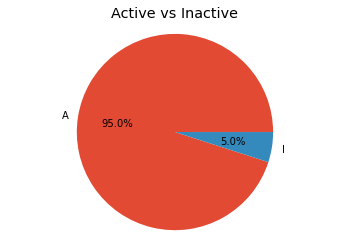

In [12]:
plt.pie(df_inactive_count['Percentage'],labels= df_inactive_count['Voters_Active'],autopct='%1.1f%%')
plt.title('Active vs Inactive')
plt.axis('equal')
plt.show()

### 4.3: Voters Gender Analysis

#### Slightly more female (54%) registered to vote compared to male (46%).

In [13]:
voter_id.select('Voters_Gender').distinct().count()

2

In [14]:
voter_id.select('Voters_Gender').distinct().toPandas()

,Voters_Gender
0,F
1,M


In [15]:
df_gender = voter_id.groupBy("Voters_Gender").count().toPandas()
df_gender['Percentage'] = df_gender['count']/df_gender['count'].sum() *100
df_gender

,Voters_Gender,count,Percentage
0,F,1432061,53.87137
1,M,1226236,46.12863


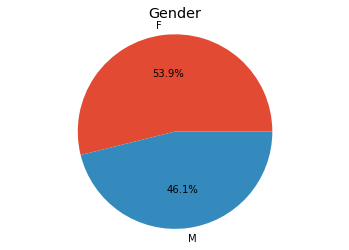

In [16]:
plt.pie(df_gender['Percentage'],labels= df_gender['Voters_Gender'],autopct='%1.1f%%')
plt.title('Gender')
plt.axis('equal')
plt.show()

### 4.4: Voters Age

#### Voter age 100 has the highest average turnout rate compared to lowest voter age 30 turnout by 5%.
#### Highest voter registeration for voter around age 60.
#### There is decline in voter turnout around age 30.

In [17]:
voter_id.groupBy("Voters_Age").avg('Genral_Election_16_Turnout_percentage').orderBy(F.col("avg(Genral_Election_16_Turnout_percentage)").desc()).show(5)

+----------+------------------------------------------+
|Voters_Age|avg(Genral_Election_16_Turnout_percentage)|
+----------+------------------------------------------+
|       100|                                      79.0|
|        19|                         75.46609324358016|
|        20|                          75.0362722456188|
|        21|                         75.00368864799759|
|        22|                         74.98135022909507|
+----------+------------------------------------------+
only showing top 5 rows



In [18]:
voter_id.groupBy("Voters_Age").avg('Genral_Election_16_Turnout_percentage').orderBy(F.col("avg(Genral_Election_16_Turnout_percentage)").asc()).show(5)

+----------+------------------------------------------+
|Voters_Age|avg(Genral_Election_16_Turnout_percentage)|
+----------+------------------------------------------+
|        30|                         74.06487170696975|
|        29|                         74.08524911834115|
|        31|                         74.08632335944523|
|        28|                         74.14994381120565|
|        32|                          74.1720175821916|
+----------+------------------------------------------+
only showing top 5 rows



In [19]:
turnout_by_age = voter_id.groupBy("Voters_Age").avg('Genral_Election_16_Turnout_percentage').toPandas()
turnout_by_age

,Voters_Age,avg(Genral_Election_16_Turnout_percentage)
0,31,74.086323
1,85,74.933387
2,65,74.804111
3,53,74.866609
4,78,74.907362
...,...,...
77,67,74.884475
78,46,74.742987
79,74,74.916173
80,36,74.422964


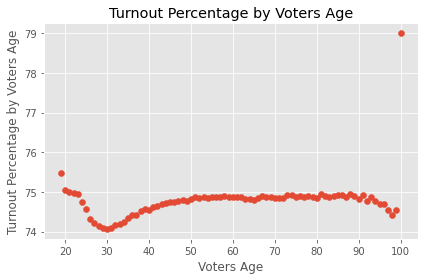

In [20]:
plt.scatter(turnout_by_age['Voters_Age'], turnout_by_age['avg(Genral_Election_16_Turnout_percentage)'])
plt.xlabel("Voters Age")
plt.ylabel("Turnout Percentage by Voters Age") 
plt.title("Turnout Percentage by Voters Age") 
plt.tight_layout() 
plt.show() 

#### We notice that the turnout rate is around 74% for all the ages.

In [21]:
df_age = voter_id.groupBy("Voters_Age").count().toPandas()

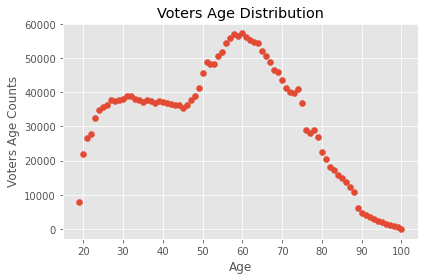

In [22]:
plt.scatter(df_age['Voters_Age'], df_age['count'])
plt.xlabel("Age")
plt.ylabel("Voters Age Counts") 
plt.title("Voters Age Distribution") 
plt.tight_layout() 
plt.show() 

### 4.5: Precinct percentage of specified party voters having voted in specified election

#### In conclusion, for different precincts, democrats voters always have higher probability of voting than republicans. 

The tables below will follow the same format for each precinct

Table1:
* 1st line: It demonstrates the percentage of active Democrats voters having voted in specified election
* 2nd line: It demonstrates the percentage of inactive Democrats voters having voted in specified election

Table2:
* 1st line: It demonstrates the percentage of active Republicans voters having voted in specified election
* 2nd line: It demonstrates the percentage of inactive Republicans voters having voted in specified election


##### 4.5.1: P08Precinct

Analysis:

Democrats voters are more active compared with republicans. 

voting for previous election does not affect whether voters are active or not now.



In [23]:
voter_id.groupBy("Voters_Active").avg('int_ElectionReturns_P08PrecinctTurnoutDemocrats').show()
voter_id.groupBy("Voters_Active").avg('int_ElectionReturns_P08PrecinctTurnoutRepublicans').show()


+-------------+----------------------------------------------------+
|Voters_Active|avg(int_ElectionReturns_P08PrecinctTurnoutDemocrats)|
+-------------+----------------------------------------------------+
|            A|                                  19.504841679610006|
|            I|                                  18.301309315319823|
+-------------+----------------------------------------------------+



+-------------+------------------------------------------------------+
|Voters_Active|avg(int_ElectionReturns_P08PrecinctTurnoutRepublicans)|
+-------------+------------------------------------------------------+
|            A|                                    7.9696484636612785|
|            I|                                     7.541557683414076|
+-------------+------------------------------------------------------+



##### 4.5.2: P10Precinct

Analysis:

Democrats and republicans voters have similar probability of voting. 

voting for previous election does not affect whether voters are active or not now.


In [24]:
voter_id.groupBy("Voters_Active").avg('int_ElectionReturns_P10PrecinctTurnoutDemocrats').show()
voter_id.groupBy("Voters_Active").avg('int_ElectionReturns_P10PrecinctTurnoutRepublicans').show()

+-------------+----------------------------------------------------+
|Voters_Active|avg(int_ElectionReturns_P10PrecinctTurnoutDemocrats)|
+-------------+----------------------------------------------------+
|            A|                                   20.75130027121639|
|            I|                                   19.31878454295267|
+-------------+----------------------------------------------------+



+-------------+------------------------------------------------------+
|Voters_Active|avg(int_ElectionReturns_P10PrecinctTurnoutRepublicans)|
+-------------+------------------------------------------------------+
|            A|                                    20.356956312470412|
|            I|                                    18.262697022767075|
+-------------+------------------------------------------------------+



##### 4.5.3: P12Precinct

Analysis:

Democrats voters have higher probability of voting compared with republicans.

voting for previous election does not affect whether voters are active or not now.


In [25]:
voter_id.groupBy("Voters_Active").avg('int_ElectionReturns_P12PrecinctTurnoutDemocrats').show()
voter_id.groupBy("Voters_Active").avg('int_ElectionReturns_P12PrecinctTurnoutRepublicans').show()


+-------------+----------------------------------------------------+
|Voters_Active|avg(int_ElectionReturns_P12PrecinctTurnoutDemocrats)|
+-------------+----------------------------------------------------+
|            A|                                  16.256092077409875|
|            I|                                  15.328731397032623|
+-------------+----------------------------------------------------+



+-------------+------------------------------------------------------+
|Voters_Active|avg(int_ElectionReturns_P12PrecinctTurnoutRepublicans)|
+-------------+------------------------------------------------------+
|            A|                                    11.399909594537041|
|            I|                                    10.552482543725976|
+-------------+------------------------------------------------------+



##### 4.5.4 P14Precinct

Analysis:

Democrats voters have higher probability of voting compared with republicans.

voting for previous election does not affect whether voters are active or not now.


In [26]:
voter_id.groupBy("Voters_Active").avg('int_ElectionReturns_P14PrecinctTurnoutDemocrats').show()
voter_id.groupBy("Voters_Active").avg('int_ElectionReturns_P14PrecinctTurnoutRepublicans').show()


+-------------+----------------------------------------------------+
|Voters_Active|avg(int_ElectionReturns_P14PrecinctTurnoutDemocrats)|
+-------------+----------------------------------------------------+
|            A|                                  22.510921090755367|
|            I|                                  20.728137011849796|
+-------------+----------------------------------------------------+



+-------------+------------------------------------------------------+
|Voters_Active|avg(int_ElectionReturns_P14PrecinctTurnoutRepublicans)|
+-------------+------------------------------------------------------+
|            A|                                    15.199266464956404|
|            I|                                     13.94000045488662|
+-------------+------------------------------------------------------+



##### 4.5.5:P16Precinct

Analysis:

Democrats voters have higher probability of voting compared with republicans.

voting for previous election does not affect whether voters are active or not now.


In [27]:
voter_id.groupBy("Voters_Active").avg('int_ElectionReturns_P16PrecinctTurnoutDemocrats').show()
voter_id.groupBy("Voters_Active").avg('int_ElectionReturns_P16PrecinctTurnoutRepublicans').show()


+-------------+----------------------------------------------------+
|Voters_Active|avg(int_ElectionReturns_P16PrecinctTurnoutDemocrats)|
+-------------+----------------------------------------------------+
|            A|                                  11.752981717830458|
|            I|                                   11.23211347904868|
+-------------+----------------------------------------------------+



+-------------+------------------------------------------------------+
|Voters_Active|avg(int_ElectionReturns_P16PrecinctTurnoutRepublicans)|
+-------------+------------------------------------------------------+
|            A|                                     6.212467879144837|
|            I|                                     5.843503840001213|
+-------------+------------------------------------------------------+



##### 4.5.6:P18Precinct

Analysis:

Democrats voters have higher probability of voting compared with republicans.

voting for previous election does not affect whether voters are active or not now.


In [28]:
voter_id.groupBy("Voters_Active").avg('int_ElectionReturns_P18PrecinctTurnoutDemocrats').show()
voter_id.groupBy("Voters_Active").avg('int_ElectionReturns_P18PrecinctTurnoutRepublicans').show()

+-------------+----------------------------------------------------+
|Voters_Active|avg(int_ElectionReturns_P18PrecinctTurnoutDemocrats)|
+-------------+----------------------------------------------------+
|            A|                                  30.394028489595456|
|            I|                                   28.03708842237739|
+-------------+----------------------------------------------------+



+-------------+------------------------------------------------------+
|Voters_Active|avg(int_ElectionReturns_P18PrecinctTurnoutRepublicans)|
+-------------+------------------------------------------------------+
|            A|                                    21.642815298947593|
|            I|                                    19.868363393757438|
+-------------+------------------------------------------------------+



### 4.6:Total number of federal donations made over the last four election cycles

#### In conclusion, larger number of donations made over the last four election cycles do increases the active voters.

In [29]:
voter_donations = voter_id.filter(voter_id.FECDonors_NumberOfDonations != 0).groupBy("Voters_Active").avg('FECDonors_NumberOfDonations').toPandas()
voter_donations

,Voters_Active,avg(FECDonors_NumberOfDonations)
0,A,16.222963
1,I,11.333986


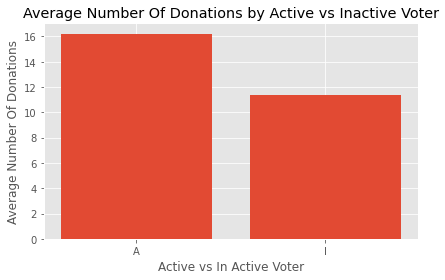

In [30]:
plt.bar(voter_donations['Voters_Active'], voter_donations['avg(FECDonors_NumberOfDonations)'])
plt.xlabel("Active vs In Active Voter")
plt.ylabel("Average Number Of Donations") 
plt.title("Average Number Of Donations by Active vs Inactive Voter") 
plt.tight_layout() 
plt.show() 

### 4.7:Estimated Household Income Analysis

#### Active voter have a higher average Household income.

In [31]:
voter_id.select("CommercialData_EstimatedHHIncomeAmount").distinct().show(5)

+--------------------------------------+
|CommercialData_EstimatedHHIncomeAmount|
+--------------------------------------+
|                                135000|
|                                113000|
|                                 85000|
|                                 87759|
|                                213000|
+--------------------------------------+
only showing top 5 rows



In [32]:
householde_income = voter_id.groupby("Voters_Active").avg("CommercialData_EstimatedHHIncomeAmount").toPandas()
householde_income

,Voters_Active,avg(CommercialData_EstimatedHHIncomeAmount)
0,A,124465.587463
1,I,106345.147080


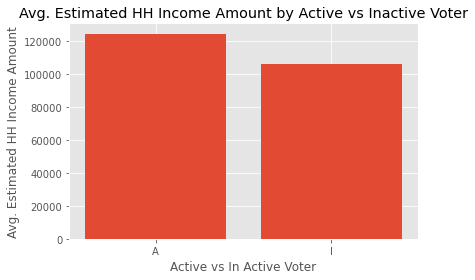

In [33]:
plt.bar(householde_income['Voters_Active'], householde_income['avg(CommercialData_EstimatedHHIncomeAmount)'])
plt.xlabel("Active vs In Active Voter")
plt.ylabel("Avg. Estimated HH Income Amount") 
plt.title("Avg. Estimated HH Income Amount by Active vs Inactive Voter") 
plt.tight_layout() 
plt.show() 

### 4.8: Home Ownership 

#### It shows that a Homeowner would more likey to be a active voter while a renter is more likely to be a inactive voter.

In [34]:
home_OwnerOrRenter = voter_id.groupby("Voters_Active", "CommercialDataLL_Home_Owner_Or_Renter").count()
home_OwnerOrRenter.where(home_OwnerOrRenter.Voters_Active == 'A').withColumn('percent', 100*F.col('count')/F.sum('count').over(Window.partitionBy())).show()
home_OwnerOrRenter.where(home_OwnerOrRenter.Voters_Active == 'I').withColumn('percent', 100*F.col('count')/F.sum('count').over(Window.partitionBy())).show()

22/05/01 22:17:46 WARN org.apache.spark.sql.execution.window.WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/01 22:17:46 WARN org.apache.spark.sql.execution.window.WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/01 22:17:47 WARN org.apache.spark.sql.execution.window.WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/01 22:17:47 WARN org.apache.spark.sql.execution.window.WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/01 22:17:47 WARN org.apache.spark.sql.execution.window.WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performanc

+-------------+-------------------------------------+-------+------------------+
|Voters_Active|CommercialDataLL_Home_Owner_Or_Renter|  count|           percent|
+-------------+-------------------------------------+-------+------------------+
|            A|                     Likely Homeowner|1947902| 77.10200617797052|
|            A|                        Likely Renter| 578494|22.897993822029484|
+-------------+-------------------------------------+-------+------------------+



22/05/01 22:17:49 WARN org.apache.spark.sql.execution.window.WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/01 22:17:49 WARN org.apache.spark.sql.execution.window.WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/01 22:17:49 WARN org.apache.spark.sql.execution.window.WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


+-------------+-------------------------------------+-----+-----------------+
|Voters_Active|CommercialDataLL_Home_Owner_Or_Renter|count|          percent|
+-------------+-------------------------------------+-----+-----------------+
|            I|                     Likely Homeowner|69509|52.69785672587774|
|            I|                        Likely Renter|62392|47.30214327412226|
+-------------+-------------------------------------+-----+-----------------+



### 4.9:Interest In Current Affairs and Politics

#### Inactive voter have less interest in politics and current affairs than active. Overall, both inactive and active voters have less interest in politics. 

In [35]:
if_interest_in_politics = voter_id.groupby("Voters_Active","CommercialDataLL_Interest_in_Current_Affairs_Politics_In_Household").count()
if_interest_in_politics.where(if_interest_in_politics.Voters_Active == 'A').withColumn('percent', 100*F.col('count')/F.sum('count').over(Window.partitionBy())).show()
if_interest_in_politics.where(if_interest_in_politics.Voters_Active == 'I').withColumn('percent', 100*F.col('count')/F.sum('count').over(Window.partitionBy())).show()


22/05/01 22:17:49 WARN org.apache.spark.sql.execution.window.WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/01 22:17:49 WARN org.apache.spark.sql.execution.window.WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/01 22:17:50 WARN org.apache.spark.sql.execution.window.WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/01 22:17:50 WARN org.apache.spark.sql.execution.window.WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/01 22:17:50 WARN org.apache.spark.sql.execution.window.WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performanc

+-------------+------------------------------------------------------------------+-------+------------------+
|Voters_Active|CommercialDataLL_Interest_in_Current_Affairs_Politics_In_Household|  count|           percent|
+-------------+------------------------------------------------------------------+-------+------------------+
|            A|                                                                No|2073662| 82.07984813148849|
|            A|                                                               Yes| 452734|17.920151868511507|
+-------------+------------------------------------------------------------------+-------+------------------+



22/05/01 22:17:50 WARN org.apache.spark.sql.execution.window.WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/01 22:17:50 WARN org.apache.spark.sql.execution.window.WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/01 22:17:51 WARN org.apache.spark.sql.execution.window.WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/01 22:17:51 WARN org.apache.spark.sql.execution.window.WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
22/05/01 22:17:51 WARN org.apache.spark.sql.execution.window.WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performanc

+-------------+------------------------------------------------------------------+------+------------------+
|Voters_Active|CommercialDataLL_Interest_in_Current_Affairs_Politics_In_Household| count|           percent|
+-------------+------------------------------------------------------------------+------+------------------+
|            I|                                                                No|112569| 85.34355311938499|
|            I|                                                               Yes| 19332|14.656446880615007|
+-------------+------------------------------------------------------------------+------+------------------+



### 4.10: Net houehold worth

#### In summary, both active and inactive voters have similar distribution for net household worth. On average, active voters have higher net household worth than inactive voters.

In [36]:
df_networth_inactive = voter_id.where(voter_id.Voters_Active == "I").groupby("CommercialDataLL_HH_Net_Worth").count().toPandas()
df_networth_inactive

,CommercialDataLL_HH_Net_Worth,count
0,$100000-249999,56242
1,$50000-99999,46300
2,$25000-49999,7126
3,$1-4999,3740
4,$250000-499999,9683
5,$499999+,3981
6,$10000-24999,2875
7,$5000-9999,1954


Text(0.5, 1.0, 'Inactive voter')

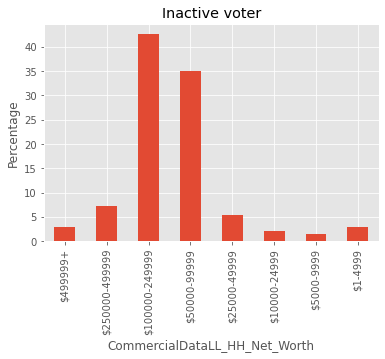

In [37]:
df_networth_inactive['Percentage'] = df_networth_inactive['count']/df_networth_inactive['count'].sum() *100
df_networth_inactive = df_networth_inactive.reindex([5,4,0,1,2,6,7,3]).set_index('CommercialDataLL_HH_Net_Worth')
df_networth_inactive['Percentage'].plot.bar()
plt.ylabel('Percentage')
plt.title('Inactive voter')

In [38]:
df_networth_active = voter_id.na.drop(subset='CommercialDataLL_HH_Net_Worth').where(voter_id.Voters_Active == "A").groupby("CommercialDataLL_HH_Net_Worth").count().toPandas()
df_networth_active

,CommercialDataLL_HH_Net_Worth,count
0,$100000-249999,1261869
1,$50000-99999,484840
2,$25000-49999,145745
3,$1-4999,49719
4,$250000-499999,372871
5,$499999+,138404
6,$10000-24999,44982
7,$5000-9999,27966


Text(0.5, 1.0, 'Active voter')

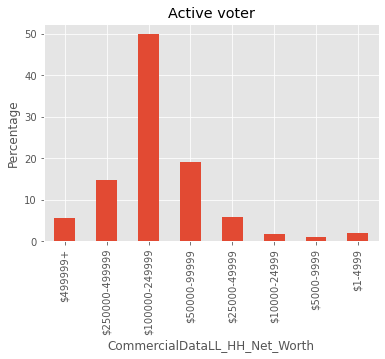

In [39]:
df_networth_active['Percentage'] = df_networth_active['count']/df_networth_active['count'].sum() *100
df_networth_active = df_networth_active.reindex([5,4,0,1,2,6,7,3]).set_index('CommercialDataLL_HH_Net_Worth')
df_networth_active['Percentage'].plot.bar()
plt.ylabel('Percentage')
plt.title('Active voter')

### 4.11:Voter trend based on education

#### Inactive voters have higest percentage of "Some college degree" compared to active voters who have "Bachelors degree".

In [40]:
vote_education_percent_active = voter_id.where(voter_id.Voters_Active == "A").groupby("CommercialData_Education").count().toPandas()
vote_education_percent_active['Percentage'] = vote_education_percent_active['count']/vote_education_percent_active['count'].sum() *100
vote_education_percent_active

,CommercialData_Education,count,Percentage
0,Grad Degree - Extremely Likely,271569,10.749265
1,Grad Degree - Likely,302429,11.970768
2,Bach Degree - Extremely Likely,488625,19.340792
3,HS Diploma - Likely,269639,10.672872
4,Less than HS Diploma - Ex Like,432,0.017099
5,Some College - Likely,380623,15.065849
6,Vocational Technical Degree - Extremely Likely,2756,0.109088
7,Some College -Extremely Likely,98373,3.893808
8,HS Diploma - Extremely Likely,286506,11.340502
9,Bach Degree - Likely,324660,12.850717


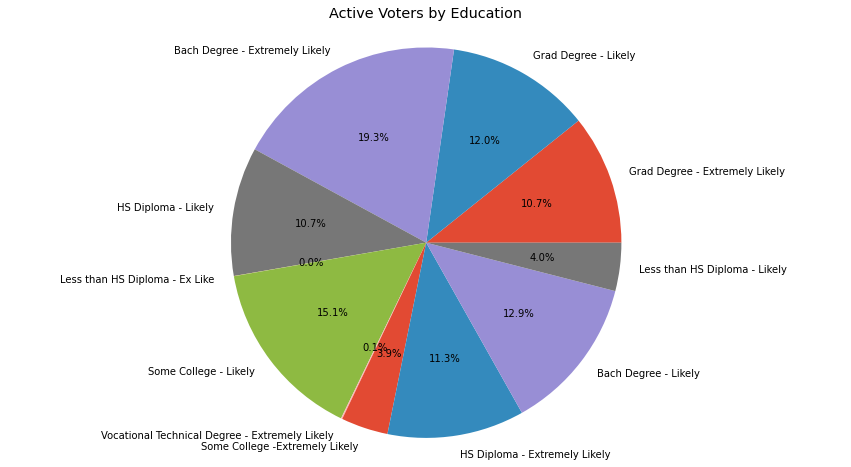

In [41]:
plt.figure(figsize=(15,8))
plt.pie(vote_education_percent_active['Percentage'],labels= vote_education_percent_active['CommercialData_Education'],autopct='%1.1f%%')
plt.title('Active Voters by Education')
plt.axis('equal')
plt.show()

In [42]:
vote_education_percent_inactive = voter_id.where(voter_id.Voters_Active == "I").groupby("CommercialData_Education").count().toPandas()
vote_education_percent_inactive['Percentage'] = vote_education_percent_inactive['count']/vote_education_percent_inactive['count'].sum() *100
vote_education_percent_inactive

,CommercialData_Education,count,Percentage
0,Grad Degree - Extremely Likely,5631,4.269111
1,Grad Degree - Likely,16241,12.313023
2,Bach Degree - Extremely Likely,14835,11.247072
3,HS Diploma - Likely,20361,15.436577
4,Less than HS Diploma - Ex Like,31,0.023502
5,Some College - Likely,26275,19.920243
6,Vocational Technical Degree - Extremely Likely,129,0.097801
7,Some College -Extremely Likely,3719,2.819539
8,HS Diploma - Extremely Likely,12296,9.322143
9,Bach Degree - Likely,19586,14.849016


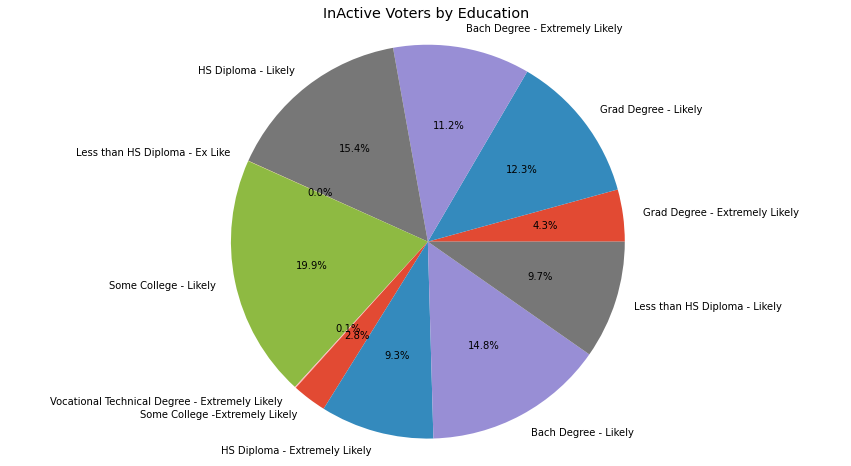

In [43]:
plt.figure(figsize=(15,8))
plt.pie(vote_education_percent_inactive['Percentage'],labels= vote_education_percent_inactive['CommercialData_Education'],autopct='%1.1f%%')
plt.title('InActive Voters by Education')
plt.axis('equal')
plt.show()

### 4.12: Voter distribution based on Occupation

#### Both active and inactive voter have large percentage of unknown occupations.

In [44]:
vote_occupation_percent_active = voter_id.where(voter_id.Voters_Active == "A").groupby("CommercialData_Occupation").count().toPandas()
vote_occupation_percent_active['Percentage'] = vote_occupation_percent_active['count']/vote_occupation_percent_active['count'].sum() *100
vote_occupation_percent_active.sort_values('Percentage', ascending=False)

,CommercialData_Occupation,count,Percentage
82,Unknown,1520737,60.193928
235,Medical-Nurse,98437,3.896341
72,Other-Retired,93576,3.703932
6,Manufacturing-Skilled,93064,3.683666
65,Office Assistant-General,72107,2.854145
...,...,...,...
28,Manufacturing-Foundry Worker,1,0.000040
30,Creative-Fashion Model,1,0.000040
103,Food Services-Brewer,1,0.000040
156,Skilled Trades-Miner,1,0.000040


In [45]:
vote_occupation_percent_inactive = voter_id.where(voter_id.Voters_Active == "I").groupby("CommercialData_Occupation").count().toPandas()
vote_occupation_percent_inactive['Percentage'] = vote_occupation_percent_inactive['count']/vote_occupation_percent_inactive['count'].sum() *100
vote_occupation_percent_inactive.sort_values('Percentage', ascending=False)

,CommercialData_Occupation,count,Percentage
73,Unknown,100427,76.138164
51,Other-Retired,3490,2.645924
185,Medical-Nurse,3427,2.598161
3,Manufacturing-Skilled,2992,2.268368
165,Other-Homemaker,2152,1.631527
...,...,...,...
128,Creative-Photographer,1,0.000758
137,Skilled Trades-Travel Agent,1,0.000758
151,Manufacturing-Cutter,1,0.000758
157,Sales-Merchandiser,1,0.000758


#### Next, we will build a prediction model to predict if a register voter is active or inactive. Moreover, provide recommendation on how to engage inactive voter to become active in the voting process.

## 5:Machine Learning

### Intoduction
We will build 3 supervised machine learning model in this part for classification. They are Logistic Regression, XGboostm and Random Forest. 

The process of building the models are as follows:

* 5.1: Packages Import and Variables Selection
* 5.2: Undersampling
* 5.3: RFormula to produces a vector column of features and a string column of label.
* 5.4: Logistic Regression
* 5.5: XGboost
* 5.6: Random Forest

#### 5.1: Packages Import and Variables Selection 

#### Based on the results in EDA part, all of the variables are related to voter turnout to some extent. But since some features are not for individual, we delete them.

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pyspark.sql.functions import *
from pyspark.sql.types import BooleanType
from pyspark.ml.feature import RFormula
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.tuning import TrainValidationSplit

In [47]:
df_ml = voter_id.drop(*["LALVOTERID", 'Genral_Election_16_Turnout_percentage','int_ElectionReturns_P08PrecinctTurnoutDemocrats','int_ElectionReturns_P08PrecinctTurnoutRepublicans','int_ElectionReturns_P10PrecinctTurnoutDemocrats','int_ElectionReturns_P10PrecinctTurnoutRepublicans','int_ElectionReturns_P12PrecinctTurnoutDemocrats','int_ElectionReturns_P12PrecinctTurnoutRepublicans','int_ElectionReturns_P14PrecinctTurnoutDemocrats','int_ElectionReturns_P14PrecinctTurnoutRepublicans','int_ElectionReturns_P16PrecinctTurnoutDemocrats','int_ElectionReturns_P16PrecinctTurnoutRepublicans','int_ElectionReturns_P18PrecinctTurnoutDemocrats','int_ElectionReturns_P18PrecinctTurnoutRepublicans'])
[(c, df_ml.where(col(c).isNull()).count()) for c in df_ml.columns]

[('Voters_Active', 0),
 ('Residence_Addresses_City', 0),
 ('Voters_Gender', 0),
 ('Voters_Age', 0),
 ('County', 0),
 ('CommercialDataLL_Home_Owner_Or_Renter', 0),
 ('FECDonors_NumberOfDonations', 0),
 ('CommercialDataLL_Interest_in_Current_Affairs_Politics_In_Household', 0),
 ('CommercialDataLL_HH_Net_Worth', 0),
 ('CommercialData_EstimatedHHIncomeAmount', 0),
 ('CommercialData_Education', 0),
 ('CommercialData_Occupation', 0),
 ('Parties_Description', 0),
 ('Languages_Description', 0),
 ('MaritalStatus_Description', 0)]

In [48]:
df_ml = df_ml.withColumn("Voters_Active", F.when(col("Voters_Active") == 'A', 1).otherwise(F.when(col("Voters_Active") == 'I', 0)).cast(BooleanType()))
df_ml = df_ml.withColumn('Voters_Active', col('Voters_Active').cast(BooleanType()))

In [49]:
df_ml.cache()

DataFrame[Voters_Active: boolean, Residence_Addresses_City: string, Voters_Gender: string, Voters_Age: int, County: string, CommercialDataLL_Home_Owner_Or_Renter: string, FECDonors_NumberOfDonations: int, CommercialDataLL_Interest_in_Current_Affairs_Politics_In_Household: string, CommercialDataLL_HH_Net_Worth: string, CommercialData_EstimatedHHIncomeAmount: int, CommercialData_Education: string, CommercialData_Occupation: string, Parties_Description: string, Languages_Description: string, MaritalStatus_Description: string]

In [50]:
print("This datasets consists of {} rows.".format(df_ml.count()))

This datasets consists of 2658297 rows.


### 5.2: Undersampling
#### Since the number of active voters and inactive voters are imbalanced, we do undersampling to balance two classes. It can improve the performance of our model.

#### We have 264206 data in total after undersampling for model building.

In [51]:
major_df = df_ml.filter(col("Voters_Active") == True)
minor_df = df_ml.filter(col("Voters_Active") == False)
ratio = int(major_df.count()/minor_df.count())
print("ratio: {}".format(ratio))

ratio: 19


In [52]:
sampled_majority_df = major_df.sample(False, 1/ratio)
df_under = sampled_majority_df.unionAll(minor_df)
df_under.count()

265111

### 5.3: RFormula to produces a vector column of features and a string column of label.

In [53]:
supervised = RFormula(formula="Voters_Active ~ .")

In [54]:
fittedRF = supervised.fit(df_under)

In [55]:
preparedDF = fittedRF.transform(df_under)

In [56]:
featureCols = pd.DataFrame(preparedDF.schema["features"].metadata["ml_attr"]["attrs"]["binary"]+
  preparedDF.schema["features"].metadata["ml_attr"]["attrs"]["numeric"]).sort_values("idx")
featureCols = featureCols.set_index('idx')

In [57]:
train, test = preparedDF.randomSplit(weights=[0.7,0.3], seed=222)

In [58]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
aucEvaluator = BinaryClassificationEvaluator(metricName='areaUnderROC')

In [59]:
summary_df = pd.DataFrame(columns = ['Model', 'Train AUC', 'Test AUC'])

### 5.4:Logistic Regression

In [60]:
lr = LogisticRegression()
lrModel = lr.fit(train)

22/05/01 22:18:43 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
22/05/01 22:18:43 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS


In [61]:
print('Train AUC:', aucEvaluator.evaluate(lrModel.transform(train)))
print('Test AUC:', aucEvaluator.evaluate(lrModel.transform(test)))

Train AUC: 0.7687178932717011


Test AUC: 0.7664411505438362


#### 5.4.1: Feature importance

In [62]:
# Your answer goes here
coefsArray = np.array(lrModel.coefficients) # convert to np.array
coefsDF = pd.DataFrame(coefsArray, columns=['coefs']) # to pandas
coefsDF = coefsDF.merge(featureCols, left_index=True, right_index=True) # join it with featureCols we created above
coefsDF.sort_values('coefs', inplace=True) # Sort them
coefsDF

,coefs,name
710,-12.019813,CommercialData_Occupation_Civil Servant-Air Tr...
830,-11.983883,Languages_Description_Kazakh
389,-11.799442,Residence_Addresses_City_N Chelmsford
827,-11.623444,Languages_Description_Dzongha
770,-11.416413,CommercialData_Occupation_Skilled Trades-Publi...
...,...,...
504,10.625679,Residence_Addresses_City_North Quincy
498,10.636783,Residence_Addresses_City_E Bridgewater
706,10.674284,CommercialData_Occupation_Manufacturing-Installer
505,10.693504,Residence_Addresses_City_Roxbury Crossing


In [63]:
summary_df = summary_df.append({
 'Model' : 'LogisticRegression',
 'Train AUC': aucEvaluator.evaluate(lrModel.transform(train)),
 'Test AUC': aucEvaluator.evaluate(lrModel.transform(test))
}, ignore_index=True)

### 5.5:XGboost

In [64]:
xgb = GBTClassifier()
xgbmodel = xgb.fit(train)

In [65]:
print('Train AUC:', aucEvaluator.evaluate(xgbmodel.transform(train)))
print('Test AUC:', aucEvaluator.evaluate(xgbmodel.transform(test)))

Train AUC: 0.7658186391036327


Test AUC: 0.7646153618843973


In [66]:
summary_df = summary_df.append({
 'Model' : 'GBTClassifier',
 'Train AUC': aucEvaluator.evaluate(xgbmodel.transform(train)),
 'Test AUC': aucEvaluator.evaluate(xgbmodel.transform(test))
}, ignore_index=True)

#### 5.5.1: XGboost with  Hyperparameter Tuning

In [ ]:
gbt = GBTClassifier(maxIter=10,seed=42)
paramGrid_gbt = ParamGridBuilder() \
 .addGrid(gbt.maxIter,[5, 10]) \
 .addGrid(gbt.maxDepth,[5, 10]) \
 .build()

tvs_gbt = TrainValidationSplit()\
 .setTrainRatio(0.75)\
 .setEstimatorParamMaps(paramGrid_gbt)\
 .setEstimator(gbt)\
 .setEvaluator(aucEvaluator)

gbt_hpt_model = tvs_gbt.fit(train)
best_gbt = gbt_hpt_model.bestModel

In [68]:
# Your answer goes here
print('Train AUC:', aucEvaluator.evaluate(best_gbt.transform(train)))
print('Test AUC:', aucEvaluator.evaluate(best_gbt.transform(test)))

22/05/01 22:36:47 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1241.1 KiB


Train AUC: 0.788856575131027


22/05/01 22:36:54 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1241.1 KiB


Test AUC: 0.7656314968488538


In [69]:
summary_df = summary_df.append({
 'Model' : 'GBTClassifier_HyperparameterTuning',
 'Train AUC': aucEvaluator.evaluate(best_gbt.transform(train)),
 'Test AUC': aucEvaluator.evaluate(best_gbt.transform(test))
}, ignore_index=True)

22/05/01 22:37:00 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1241.1 KiB
22/05/01 22:37:07 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1241.1 KiB


#### 5.5.2:Feature importance

In [70]:
# Your answer goes here
coefsArray = np.array(best_gbt.featureImportances) # convert to np.array
coefsDF = pd.DataFrame(coefsArray, columns=['coefs']) # to pandas
coefsDF = coefsDF.merge(featureCols, left_index=True, right_index=True) # join it with featureCols we created above
coefsDF.sort_values('coefs', inplace=True, ascending=False) # Sort them
coefsDF.head(10)

,coefs,name
840,0.163832,MaritalStatus_Description_Married
514,0.163588,Voters_Age
528,0.078876,CommercialDataLL_Home_Owner_Or_Renter_Likely H...
538,0.063783,CommercialData_EstimatedHHIncomeAmount
839,0.023003,MaritalStatus_Description_Not Married
0,0.016384,Residence_Addresses_City_Boston
513,0.014366,Voters_Gender_F
1,0.013976,Residence_Addresses_City_Worcester
546,0.012738,CommercialData_Education_Less than HS Diploma ...
11,0.012591,Residence_Addresses_City_Taunton


### 5.6: Random Forest

In [71]:
rf = RandomForestClassifier()
rffit = rf.fit(train)

In [72]:
print('Train AUC:', aucEvaluator.evaluate(rffit.transform(train)))
print('Test AUC:', aucEvaluator.evaluate(rffit.transform(test)))

Train AUC: 0.7320244865984287


Test AUC: 0.7313933427302796


In [73]:
summary_df = summary_df.append({
 'Model' : 'Random_Forest',
 'Train AUC': aucEvaluator.evaluate(rffit.transform(train)),
 'Test AUC': aucEvaluator.evaluate(rffit.transform(test))
}, ignore_index=True)

#### 5.6.1: Random Forest with  Hyperparameter Tuning

In [74]:
rf = RandomForestClassifier()
stages_rf = [rf]
pipeline_rf = Pipeline().setStages(stages_rf)

In [75]:
rfparamGrid = (ParamGridBuilder()
               .addGrid(rf.maxDepth, [2, 5, 10])
               .addGrid(rf.maxBins, [5, 10, 20])
               .addGrid(rf.numTrees, [5, 20, 50])
               .build())

In [ ]:
tvs_rf = TrainValidationSplit()\
        .setTrainRatio(0.75)\
        .setEstimatorParamMaps(rfparamGrid)\
        .setEstimator(pipeline_rf)\
        .setEvaluator(aucEvaluator)

tvsFitted_rf = tvs_rf.fit(train)
best_rf = tvsFitted_rf.bestModel

In [ ]:
print('Train AUC:', aucEvaluator.evaluate(best_rf.transform(train)))
print('Test AUC:', aucEvaluator.evaluate(best_rf.transform(test)))

22/05/01 22:55:34 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1457.3 KiB


Train AUC: 0.7452972940845828


22/05/01 22:55:43 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1457.3 KiB


Test AUC: 0.7434785886512406


In [ ]:
summary_df = summary_df.append({
 'Model' : 'Random_Forest_HyperparameterTuning',
 'Train AUC': aucEvaluator.evaluate(best_rf.transform(train)),
 'Test AUC': aucEvaluator.evaluate(best_rf.transform(test))
}, ignore_index=True)

22/05/01 22:55:50 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1457.3 KiB
22/05/01 22:55:59 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 1457.3 KiB


#### 5.6.2:Feature importance

In [ ]:
# Your answer goes here
coefsArray = np.array(best_rf.stages[0] .featureImportances) # convert to np.array
coefsDF = pd.DataFrame(coefsArray, columns=['coefs']) # to pandas
coefsDF = coefsDF.merge(featureCols, left_index=True, right_index=True) # join it with featureCols we created above
coefsDF.sort_values('coefs', inplace=True, ascending=False) # Sort them
coefsDF.head(10)

,coefs,name
840,0.188276,MaritalStatus_Description_Married
839,0.171773,MaritalStatus_Description_Not Married
528,0.134805,CommercialDataLL_Home_Owner_Or_Renter_Likely H...
514,0.133748,Voters_Age
532,0.064114,CommercialDataLL_HH_Net_Worth_$50000-99999
549,0.058212,CommercialData_Occupation_Unknown
545,0.033764,CommercialData_Education_Grad Degree - Extreme...
538,0.018324,CommercialData_EstimatedHHIncomeAmount
533,0.017554,CommercialDataLL_HH_Net_Worth_$250000-499999
546,0.015662,CommercialData_Education_Less than HS Diploma ...


### 5.7:Model Summary

In [81]:
summary_df = summary_df.sort_values('Test AUC', ascending=False)
summary_df

,Model,Train AUC,Test AUC
0,LogisticRegression,0.768715,0.766444
2,GBTClassifier_HyperparameterTuning,0.788856,0.765637
1,GBTClassifier,0.765816,0.764608
4,Random_Forest_HyperparameterTuning,0.745295,0.743478
3,Random_Forest,0.732020,0.731384


Best Model is Logistic Regression as it has Test AUC fo 76.6%.

## 6:Report summary

On analyzing the association between socioeconomic factors such as education, demographic, and finance on voter registration for the Commonwealth of Massachusetts.

### Following findings were recorded from the EDA:

* There are 14 counties in MA. The county with the highest voter turnout in general elections in 2016 was Barnstable and the county with the lowest turnout was Hampden.
* The percentage of active voters was 95 as compared to 5% of inactive voters.
* More female voters i.e (54%) registered to vote compared to males (46%)
* Voter age 100 has the highest average turnout rate compared to the lowest voter age 30 turnout by 5%.
* The highest voter registration for voters around age 60, also noticed that the turnout rate is around 74% for all ages.
* Moreover, there is decline in voter turnout around age 30.
* For different precincts, Democrats have a higher percentage of voting than republicans.
* Active Voters have higher number of donations compared to inactive voters.
* Active voters have a higher average Household income.
* It shows that a homeowner would more likely to be an active voter while a renter is more likely to be an inactive voter.
* Inactive voters have less interest in politics and current affairs than active. Overall, both inactive and active voters have less interest in politics.
* Inactive voters have the highest percentage of "Some college degree" compared to active voters who have "Bachelors degree". Active voters have higher eduction than inactive voter.

The purpose of the project is to analyze which factors drive the voter turnout in Massachusetts. The above findings convey the fact that higher education and better employment lead to a more sense of responsibility among the people which in turn leads to a better voter turnout. Also, older people are more likely to vote as age invokes maturity and responsibility among the citizens.

### Machine Learning findings:

Further, we used Machine learning models to predict if a registered voter is active or inactive. We used undersampling to balance the active and inactive voter classes to improve the performance of our model and built three models
* Logistic Regression with 76.6% AUC
* XGboost with 76.5% AUC
* Random Forest with 74.2% AUC.

So our best model was Logistic Regression.

According to the logistic regression model a person with the attributes such as:
* Occupation
* Residence addresses contribute more to predicting if the voter is active or inactive.
* According to XGboost the top attributes contributing to predicting if the voter is active or inactive are
* Voters Age
* Marital Status
* Net Worth
* Residence Address
* Education and Degree

According to Random Forest, the top attributes contributing to predicting of the voter is active or inactive are:
* Marital Status
* Voters Age
* Net Worth
* Occupation
* House Ownership

The most common attributes in both XGboost and random Forest are voters' age, marital status, and net worth. The most common attribute to predict in all three models is the residence address.
In conclusion, it depends more on the locality in which the person is situated which influences a person's motivation to vote or stay inactive.


### Recommendation to improve engagement of inactive voters:

* We can establish from the above-recorded facts in EDA that an inactive voter is more likely to turn active through education.
* Education induces the practice of thinking in a person on matters related to society.
* It gives a person the opportunity to pursue better employment.
* It can induce a motivation-driven penchant toward a political party or an individual.
* Eventually, better education and better employment will lead to a better lifestyle which places people in a better society and thus adduce social responsibility.